In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# AP 5: Analysis

## 1. Exploratory Data Analysis

In this sectoion, we will perform exploratory data analysis (EDA) on our adjudicated dataset to better understand the distribution of rhetorical strategy labels. We aim to identify patterns and any potential biases that could impact model performance in our classification task.

### Dataset Bias and Balance

Our collected dataset consists of 500 labeled examples of rhetorical strategies in presidential speeches. 

In [2]:
df = pd.read_csv("./ap5_data/all_500_annotations.csv")
df = df[["Text", "Final_Label"]]

df.head()

,Text,Final_Label
0,so that when the Court of Arbitration nominat...,E
1,"$24,400,997.38, and expenditures, exclusive of...",E
2,"18,000 are engaged in the Coast Artillery and ...",E
3,1919. This has been a normal and natural appli...,E
4,23 million school children under the Safe and ...,CTA


/tmp/ipykernel_40/3083134066.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette="muted")


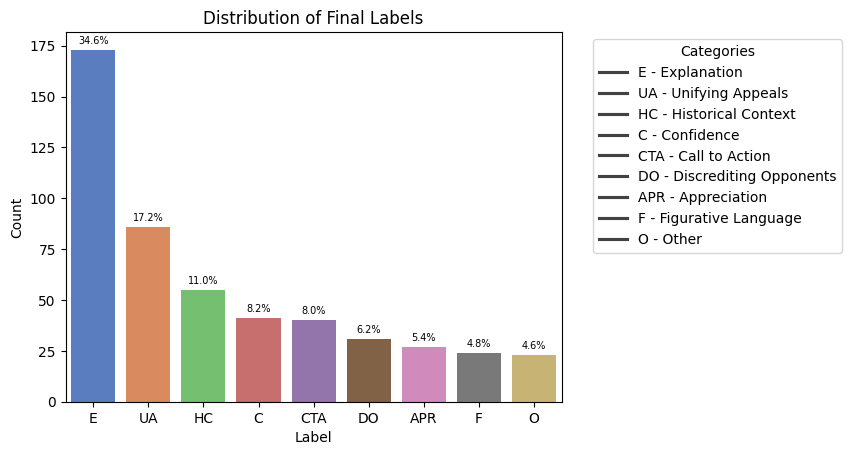

In [3]:

label_counts = df["Final_Label"].value_counts()
total = label_counts.sum()
label_full_names = {
    "E": "Explanation",
    "UA": "Unifying Appeals",
    "HC": "Historical Context",
    "C": "Confidence",
    "CTA": "Call to Action",
    "DO": "Discrediting Opponents",
    "APR": "Appreciation",
    "F": "Figurative Language",
    "O": "Other"
}

plt.figure()
ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette="muted")

# Add percentages above bars
for i, count in enumerate(label_counts.values):
    percent = (count / total) * 100
    ax.text(i, count + 2, f"{percent:.1f}%", ha='center', va='bottom', fontsize=7)

plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of Final Labels")

# Create a custom legend
legend_labels = [f"{key} - {value}" for key, value in label_full_names.items()]
plt.legend(legend_labels, title="Categories", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The above bar plot shows us that the label E (explanation) is overrepresented in our dataset, making up approximately 34.6% of all annotations. Less frequent labels like APR (appreciation), F (use of figurative language), O (other/none) each make up less than 6% of the data. We recognize that this imbalance could bias the model towards overpredicting E, which we anticipate to lower recall and precision for the other underrepresented categories.

What might be causing the overrepresentation of E? 

Since the documents of interest are taken from text chunks of presidential speeches, a large portion of these speeches naturally focused on providing context, descriptions, and clarifications to the public. We noticed that in our sampled data, presidents often explain policies, legislative decisions, or social issues to establish credibility amongst the audience. 

In our annotation guidelines, annotators were also instructed to prioritize the "most dominant" strategy. Explanations tend to be extended and detailed, making them appear more dominant over shorter strategies like discrediting opponents or figurative language. As a result, annotators were more likely to tag a mixed content passage as E when explanation was present, even if other rhetorical devices are present. When annotating, we also wanted to use the label O sparingly. These reasons likely contributed to the overrepresentation of E in our dataset.

### Inter-Annotator Agreement (IAA) Analysis

In [4]:
df1 = pd.read_csv("all_annotated_pivoted.csv")
df1

,Text,Label1,Label2
0,so that when the Court of Arbitration nominat...,O,E
1,"$24,400,997.38, and expenditures, exclusive of...",CTA,E
2,"18,000 are engaged in the Coast Artillery and ...",E,E
3,1919. This has been a normal and natural appli...,E,E
4,23 million school children under the Safe and ...,UA,C
...,...,...,...
449,write-let your own minds turn to that task. Yo...,F,F
450,written us asking how they can help. The volun...,UA,CTA
451,year.I am sure that secular education and mora...,HC,DO
452,yet history tells us that blind loyalty to a s...,CTA,UA


In [5]:
df2 = pd.read_csv("extra_pivoted.csv")
df2

,Unnamed: 0,Text,label1,label2,label3,label4,final
0,0,Afghanistan. And that is why we've launched a ...,UA,F,UA,UA,UA
1,1,And approximately 5 of those hours were talks ...,APR,E,F,C,C
2,2,For fourteen years I have placed my confidence...,UA,C,HC,C,C
3,3,Iraqi security forces so they can increasingly...,HC,E,F,UA,UA
4,4,JONES: Mr. President — (Laughter.) THE PRESIDE...,APR,APR,O,O,APR
5,5,"Meals Ready to Eat -- or MREs, 13.4 million li...",E,E,E,E,E
6,6,"State of Texas or otherwise;"" and Whereas it w...",E,E,E,E,E
7,7,"THE PRESIDENT: Well, let me take the second is...",UA,E,C,E,E
8,8,accomplished we took highly sensitive material...,F,DO,DO,DO,DO
9,9,among the powers of the earth seems to demand ...,APR,HC,HC,O,HC


In [8]:
last50 = df2[["Text", "label1", "label2"]]
last50.rename(columns={"label1": "Label1", "label2": "Label2"}, inplace=True)
last50

/tmp/ipykernel_40/340678797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last50.rename(columns={"label1": "Label1", "label2": "Label2"}, inplace=True)


,Text,Label1,Label2
0,Afghanistan. And that is why we've launched a ...,UA,F
1,And approximately 5 of those hours were talks ...,APR,E
2,For fourteen years I have placed my confidence...,UA,C
3,Iraqi security forces so they can increasingly...,HC,E
4,JONES: Mr. President — (Laughter.) THE PRESIDE...,APR,APR
5,"Meals Ready to Eat -- or MREs, 13.4 million li...",E,E
6,"State of Texas or otherwise;"" and Whereas it w...",E,E
7,"THE PRESIDENT: Well, let me take the second is...",UA,E
8,accomplished we took highly sensitive material...,F,DO
9,among the powers of the earth seems to demand ...,APR,HC


In [9]:
all_annotations = pd.concat([df1, last50])
all_annotations

,Text,Label1,Label2
0,so that when the Court of Arbitration nominat...,O,E
1,"$24,400,997.38, and expenditures, exclusive of...",CTA,E
2,"18,000 are engaged in the Coast Artillery and ...",E,E
3,1919. This has been a normal and natural appli...,E,E
4,23 million school children under the Safe and ...,UA,C
...,...,...,...
41,"up in the sterile mountains of the far West, a...",UA,UA
42,were revoked and the inhabitants of the States...,HC,E
43,which the United States are and desire to rema...,E,CTA
44,will have been written. Let me speak to the ma...,UA,APR


In [12]:
all_annotations["disagree"] = all_annotations["Label1"] != all_annotations["Label2"]
all_annotations

,Text,Label1,Label2,disagree
0,so that when the Court of Arbitration nominat...,O,E,True
1,"$24,400,997.38, and expenditures, exclusive of...",CTA,E,True
2,"18,000 are engaged in the Coast Artillery and ...",E,E,False
3,1919. This has been a normal and natural appli...,E,E,False
4,23 million school children under the Safe and ...,UA,C,True
...,...,...,...,...
41,"up in the sterile mountains of the far West, a...",UA,UA,False
42,were revoked and the inhabitants of the States...,HC,E,True
43,which the United States are and desire to rema...,E,CTA,True
44,will have been written. Let me speak to the ma...,UA,APR,True


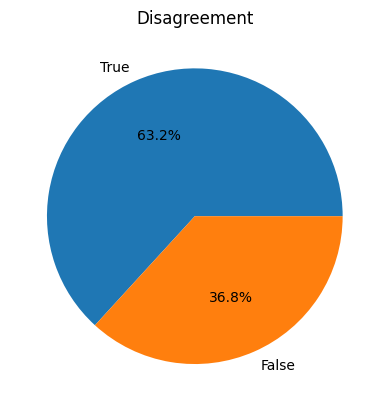

In [14]:
disagreements = all_annotations["disagree"].value_counts()

plt.pie(disagreements.values, labels=disagreements.index, autopct='%1.1f%%')
plt.title("Disagreement")
plt.show()

From here we can see that only about 37% of our annotations were agreements. This is likely because we had 9 categories, many of which were hard to identify amongst each other, and also because a passage could contain elements from multiple categories in equal amounts. For example, UA (Unifying Appeals), APR (Appreciation), and CTA (Call to Action) often come together in one paragraph, so it was hard to categorize each paragraph as just one category. To address this, future work could rework the annotation guidelines to encourage more consistent and balanced labeling across labels.

## 2. Model Results Evaluation and Analysis

We used small BERT for training. Our best development model was able to achieve a test accuracy of 0.470 with a 95% confidence interval of [0.372 0.568]. See our model notebook for model and evaluation code to replicate these results. Do note that the values printed may vary, but are roughly the same.

For further analysis, we saved a dataframe of the predicted and true labels and created confusion matrices.

In [69]:
# Loading in saved predicted test results
pred_df = pd.read_csv("/work/ap5_data/predictions.csv")
pred_df.head()

,index,confidence,true_label,predicted_label
0,27,0.239267,APR,APR
1,50,0.268263,APR,APR
2,12,0.279496,C,C
3,10,0.281066,APR,DO
4,77,0.282616,HC,F


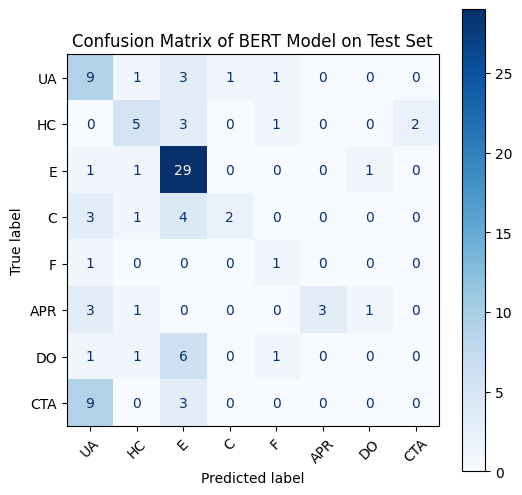

In [57]:
labels = list(set(pred_df['true_label']))
cm = confusion_matrix(pred_df['true_label'], pred_df['predicted_label'], labels=labels)
#print("Confusion Matrix: \n", confusion_matrix(all_trues, all_preds))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(6,6))  # You can adjust figure size
disp.plot(cmap='Blues', ax=ax, xticks_rotation=45)
plt.title("Confusion Matrix of BERT Model on Test Set")
plt.show()

The following confusion matrix shows that the model was able to accurately predict the label E for the presidential speeches the best. There seems to be significant amount of confusion when differentiating CTA from UA and DO from E. The model was not able to make any accurate predictions for DO and CTA speeches. 

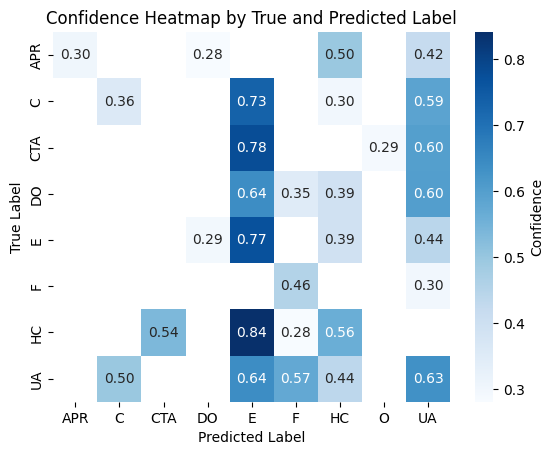

In [48]:
# Create a pivot table with true label as index, predicted label as columns, and confidence as values
heatmap_data = pred_df.pivot_table(values='confidence', index='true_label', columns='predicted_label', aggfunc='mean')

plt.figure()
sns.heatmap(heatmap_data, annot=True, cmap="Blues", fmt=".2f", cbar_kws={'label': 'Confidence'})
plt.title('Confidence Heatmap by True and Predicted Label')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

This heatmap shows that the model predicted most labels as E or UA pretty confidently. This is consistent with the analysis above.

## Conclusion

Our BERT model achieved a test accuracy of 47.0% (95% CI: [0.372, 0.568]) and up to 56.0% for dev accuracy, which is a moderate performance in classifying what kinds of strategies U.S. presidents used to make their speeches persuasive. The confusion matrix revealed that our model was able to most accurately predict the "Explanation" E label, which aligns with its overrepresentation in the collected dataset.

The low inter-annotator agreement was rather low also led us to think that having less categories could have possibly made our agreement and model more accurate, especially for the ones that are hard to differenciate (ex. UA from CTA). Labels chosen can also be subjective to the annotator, which can introduce noise into the training data. 

### Further Considerations

To improve model performance, future efforts could focus on refining the annotation guidelines to reduce ambiguity and imrpove inter-annotator consistency. The label E may also need to be reevaluated, as it is currently overrepresented. It may also be helpful to consider models that are more robust to class imbalance. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=decf1f2b-6aa9-43a6-9ea1-38fcd6e8ddf9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>